# Objective

Understand and apply various image processing techniques, including image transformations and filtering, using tools like OpenCV. Gain hands-on experience in implementing these techniques and solving common image processing tasks.

# Hands-On Exploration

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

Saving Orencia.png to Orencia.png


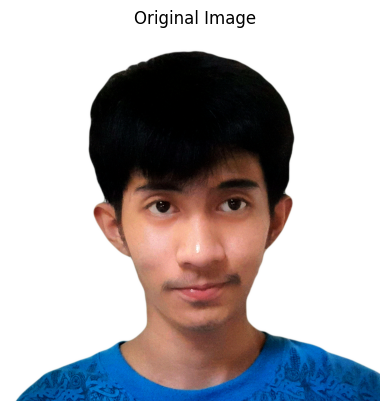

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Convert to OpenCV format
image_path = next(iter(uploaded))  # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

## Lab Session 1: Image Transformations

- **Scaling and Rotation**: Learn how to apply scaling and rotation transformations to images using OpenCV.
- **Implementation**: Practice these transformations on sample images provided in the lab.

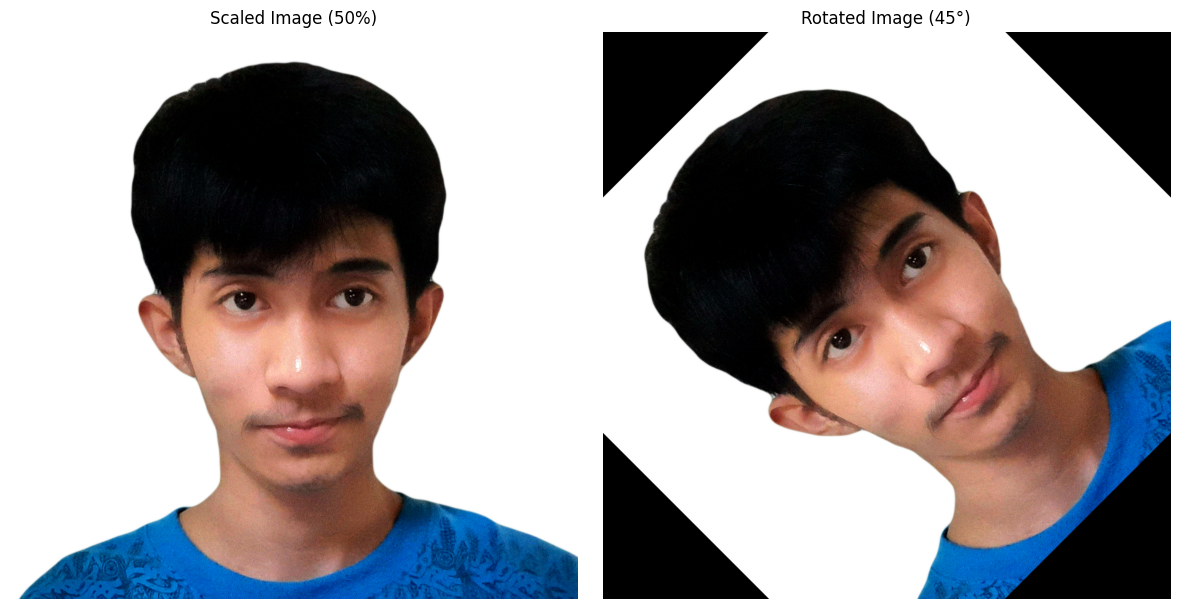

In [ ]:
# Scaling function
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

# Rotate function
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

# Apply scaling and rotation
scaled_image = scale_image(image, 0.5)
rotated_image = rotate_image(image, 45)

# Display results in a 1x2 grid
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image (50%)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Lab Session 2: Filtering Techniques

- **Blurring and Edge Detection**: Explore how to apply blurring filters and edge detection algorithms to images using OpenCV.
- **Implementation**: Apply these filters to sample images to understand their effects.

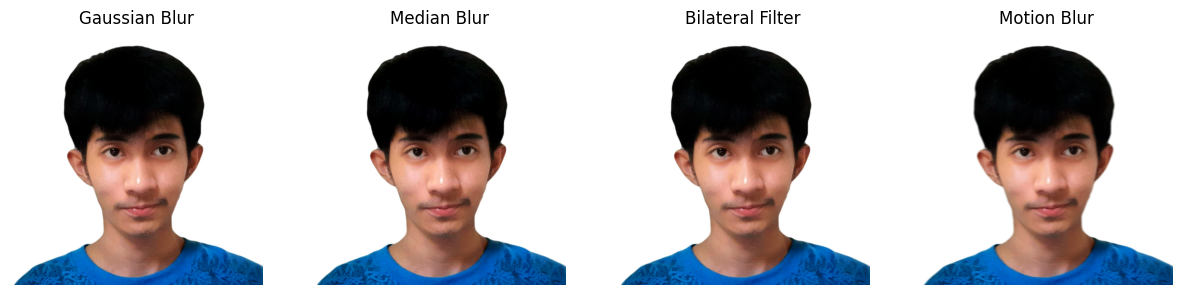

In [ ]:
# Applying Gaussian, Median, Bilateral filters, and Motion Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

# Motion blur function
def motion_blur(img):
    # Create motion blur kernel (size 15x15)
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size

    # Apply motion blur
    motion_blurred = cv2.filter2D(img, -1, kernel)
    return motion_blurred

# Apply Motion blur
motion_blurred = motion_blur(image)

# Display the results for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.show()

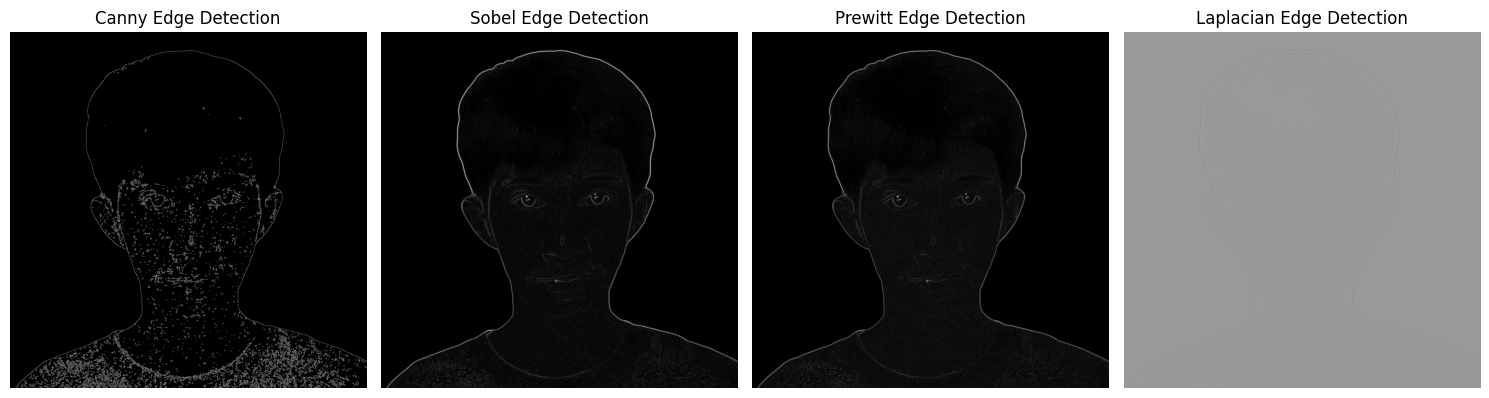

In [ ]:
# Applying Canny, Sobel, Prewitt, and Laplacian Edge Detection

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Sobel edge detection in the x direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    # Sobel edge detection in the y direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    # Combine the two gradients
    sobel_combined = cv2.magnitude(sobelx, sobely)
    return sobel_combined

sobel_edges = sobel_edge_detection(image)

# Prewitt Edge Detection
def prewitt_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    # Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
    # Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)
    return prewitt_combined

prewitt_edges = prewitt_edge_detection(image)

# Laplacian Edge Detection
def laplacian_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Laplacian operator
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian

laplacian_edges = laplacian_edge_detection(image)

# Display the results in a 1x4 grid
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

# Problem Solving Session

## Common Image Processing Tasks:
- Engage in a problem-solving session focused on common challenges encountered in image processing tasks
- **Scenario-Based Problems**: Solve scenarios where you must choose and apply appropriate image processing techniques

### Scenario 1: Image Noise Reduction

**Problem**: A Noisy image where random noise disrupts the visual quality. The goal is to reduce the noise while preserving the important details of the image.

**Solution**:
- **Gaussian Blur**: It smoothens the image by averaging pixel values in a neighborhood.
- **Median Filter**: It replaces each pixel with the median value of the neighborhood.
- **Bilateral Filter**: It smoothens the image based on both spatial and intensity information.

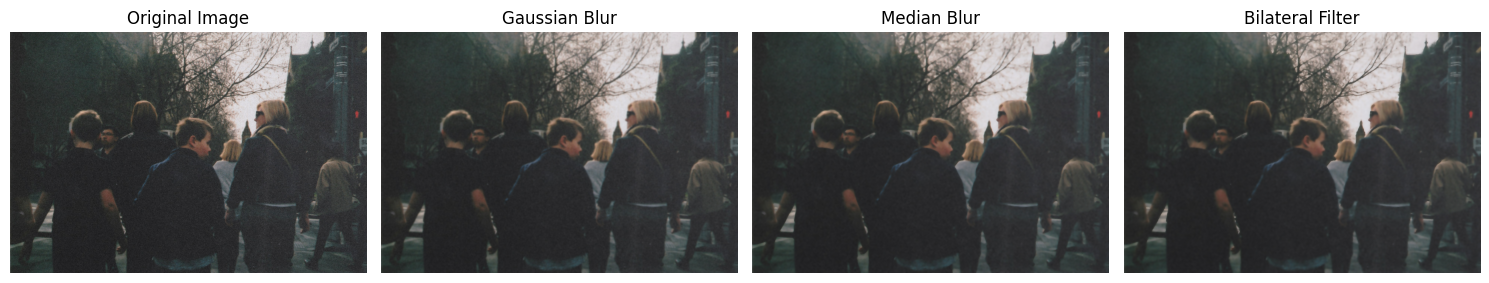

In [ ]:
# Load the image
image_path = 'noisy_image.jpg'
noisy_image = cv2.imread(image_path)

# Apply filters
gaussian_blur = cv2.GaussianBlur(noisy_image, (15, 15), 0)
median_blur = cv2.medianBlur(noisy_image, 11)
bilateral_filter = cv2.bilateralFilter(noisy_image, 15, 100, 100)

# Display the results for comparison
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Gaussian Blur
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

# Median Blur
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

# Bilateral Filter
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

### Scenario 2: Edge Detection

**Problem**: Identify edges in an image to understand the structure and boundaries of objects.

**Solution**:
- **Canny Edge Detection**: Provides precise edge detection by detecting gradients and applying hysteresis thresholding.
- **Sobel Edge Detection**: Detects edges by calculating gradients in the x and y directions and combining them.
- **Prewitt Edge Detection**: Similar to Sobel but uses different kernels for gradient computation.
- **Laplacian Edge Detection**: Detects edges by calculating the second derivative of the image.

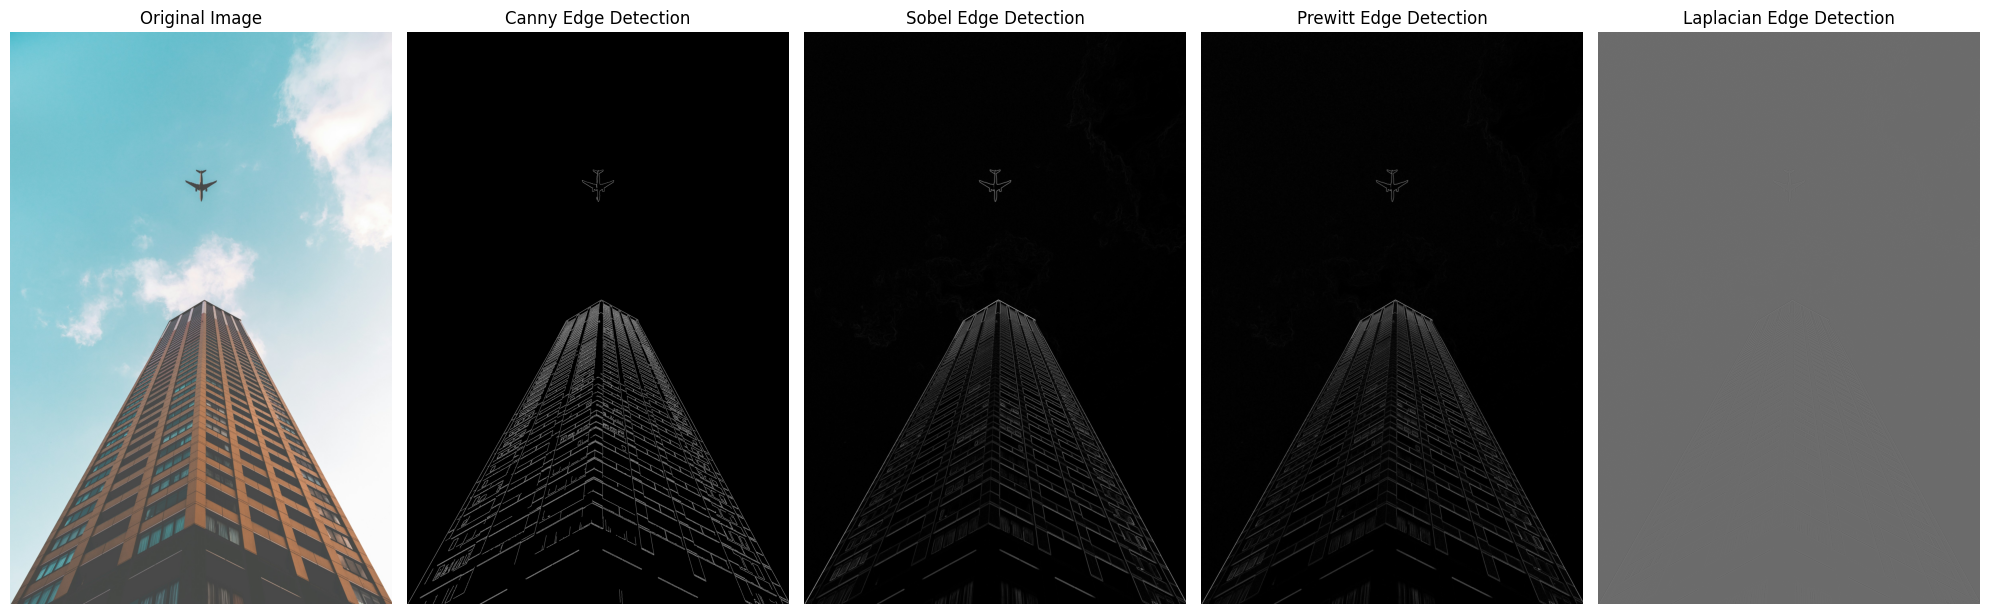

In [ ]:
# Load the image
image_path = 'edge_image.jpg'
edge_image = cv2.imread(image_path)

# Canny Edge Detection
canny_edges = cv2.Canny(edge_image, 100, 200)

# Sobel Edge Detection
def sobel_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    return cv2.magnitude(sobelx, sobely)

sobel_edges = sobel_edge_detection(edge_image)

# Prewitt Edge Detection
def prewitt_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
    return cv2.magnitude(prewittx, prewitty)

prewitt_edges = prewitt_edge_detection(edge_image)

# Laplacian Edge Detection
def laplacian_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F)

laplacian_edges = laplacian_edge_detection(edge_image)

# Display results in a 1x5 grid
plt.figure(figsize=(20, 10))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(edge_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

# Assignment

## Implementing Image Transformations and Filtering:
- Choose a set of images and apply the techniques you've learned, including scaling, rotation, blurring, and edge detection.
- **Documentation**: Document the steps taken, and the results achieved in a report.

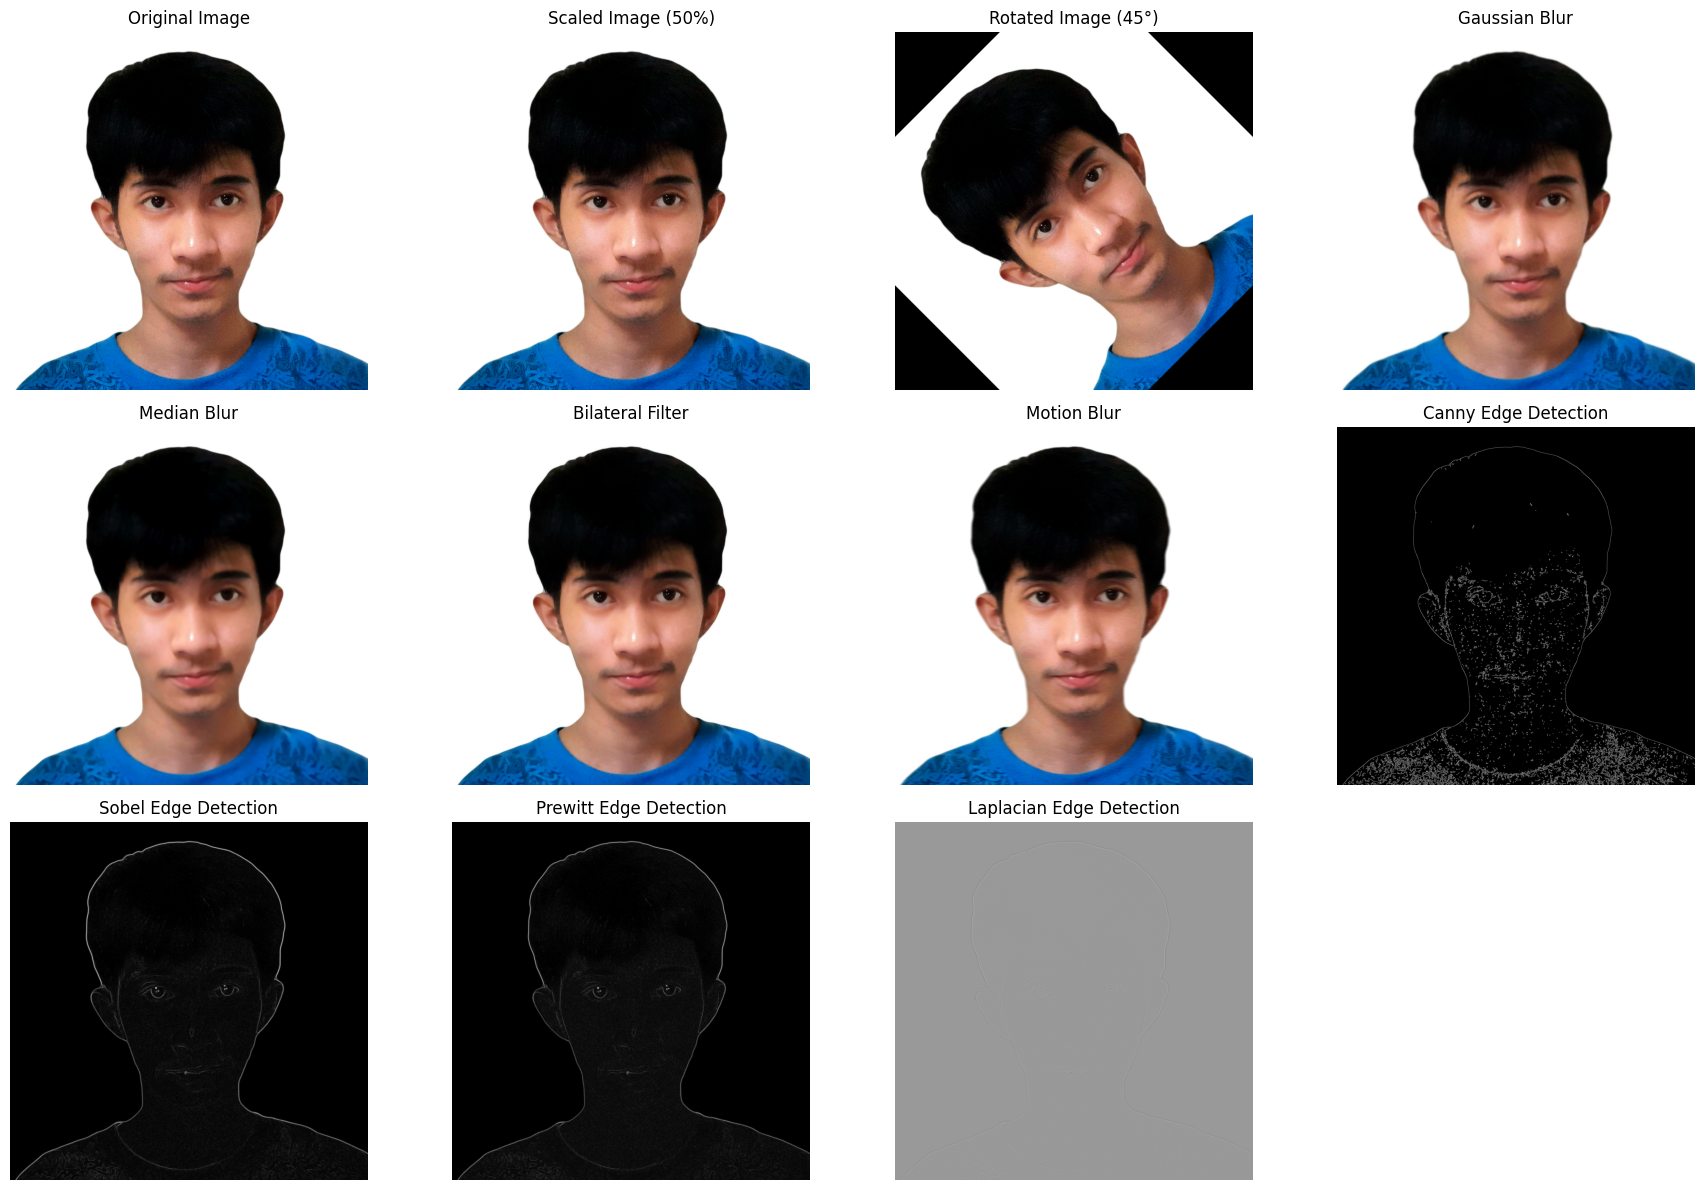

In [ ]:
# Convert to OpenCV format
image_path = 'picture.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Scaling function
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

# Rotate function
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

# Apply scaling and rotation
scaled_image = scale_image(image, 0.5)
rotated_image = rotate_image(image, 45)

# Applying Gaussian, Median, Bilateral filters, and Motion Blur
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
median_blur = cv2.medianBlur(image, 15)
bilateral_filter = cv2.bilateralFilter(image, 15, 75, 75)

# Motion blur function
def motion_blur(img):
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    motion_blurred = cv2.filter2D(img, -1, kernel)
    return motion_blurred

# Apply Motion blur
motion_blurred = motion_blur(image)

# Applying Canny, Sobel, Prewitt, and Laplacian Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

def sobel_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    return cv2.magnitude(sobelx, sobely)

sobel_edges = sobel_edge_detection(image)

def prewitt_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
    return cv2.magnitude(prewittx, prewitty)

prewitt_edges = prewitt_edge_detection(image)

def laplacian_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F)

laplacian_edges = laplacian_edge_detection(image)

# Display the results in a 3x4 grid
plt.figure(figsize=(18, 12))

# Original Image
plt.subplot(3, 4, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Scaled Image
plt.subplot(3, 4, 2)
plt.imshow(scaled_image)
plt.title("Scaled Image (50%)")
plt.axis('off')

# Rotated Image
plt.subplot(3, 4, 3)
plt.imshow(rotated_image)
plt.title("Rotated Image (45°)")
plt.axis('off')

# Gaussian Blur
plt.subplot(3, 4, 4)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blur")
plt.axis('off')

# Median Blur
plt.subplot(3, 4, 5)
plt.imshow(median_blur)
plt.title("Median Blur")
plt.axis('off')

# Bilateral Filter
plt.subplot(3, 4, 6)
plt.imshow(bilateral_filter)
plt.title("Bilateral Filter")
plt.axis('off')

# Motion Blur
plt.subplot(3, 4, 7)
plt.imshow(motion_blurred)
plt.title("Motion Blur")
plt.axis('off')

# Canny Edge Detection
plt.subplot(3, 4, 8)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Sobel Edge Detection
plt.subplot(3, 4, 9)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(3, 4, 10)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

# Laplacian Edge Detection
plt.subplot(3, 4, 11)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

## Documentation

The primary goal of this task was to explore several image processing techniques, including scaling, rotation, blurring, blur, and edge detection, using OpenCV. The image processing methods were applied to an input image `(picture.png)`, with the results visualized and compared for analysis.

### 1. Conversion to OpenCV Format

The image `(picture.png)` was first loaded and converted from BGR (OpenCV's default color format) to RGB for compatibility with `matplotlib` for visualization.

```python
image_path = 'picture.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
```

### 2. Image Scaling

The `scale_image function` was applied to reduce the size of the image by 50%. The function used the OpenCV `cv2.resize` method with linear interpolation to maintain image quality.

- **Result**: The scaled image was half the size of the original image while retaining its details.

```python
scaled_image = scale_image(image, 0.5)
```

### 3. Image Rotation

The `rotate_image` function was used to rotate the image by 45 degrees. This was achieved using the OpenCV `cv2.getRotationMatrix2D` and `cv2.warpAffine` functions.

- **Result**: The image was rotated without distortion, and the contents were displayed at a 45-degree angle.

```python
rotated_image = rotate_image(image, 45)
```

### 4. Blurring Image

Three different blurring methods were applied: Gaussian Blur, Median Blur, and Bilateral Filter. Each method offers different ways of reducing noise and smoothing the image:

- **Gaussian Blur**: Uses a weighted average of pixel values, with more weight given to the central pixels. The result was a smooth, softened image.
- **Median Blur**: Applies a median filter, which reduces noise effectively, especially for salt-and-pepper noise. The image appeared more uniformly smooth but preserved edges better than Gaussian blur.
- **Bilateral Filter**: This filter smooths the image while preserving edges, providing a clean, denoised result without overly blurring the edges.

```python
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
median_blur = cv2.medianBlur(image, 15)
bilateral_filter = cv2.bilateralFilter(image, 15, 75, 75)
```

### 5. Motion Blur

A custom motion blur filter was applied using a horizontal kernel of size 15. This simulates the effect of motion across the image, where horizontal elements become streaked.
- **Result**: The resulting image exhibited a blurring effect that mimicked camera motion.

```python
motion_blurred = motion_blur(image)
```

### 6. Edge Detection Techniques

Four edge detection methods were applied to highlight the edges and contours in the image.

- **Canny Edge Detection**: This method detected edges using gradients and thresholds. It produced sharp, well-defined edges across the image.
- **Sobel Edge Detection**: This method used first-order derivatives to detect edges. Both horizontal and vertical edges were calculated, and the result highlighted the directional gradient intensity.
- **Prewitt Edge Detection**: Similar to Sobel but simpler in its kernel, this method produced a less detailed but still effective edge map.
- **Laplacian Edge Detection**: This second-order derivative method detects edges by computing the Laplacian of the image. It provided a detailed edge map, sensitive to even small intensity variations.

```python
canny_edges = cv2.Canny(image, 100, 200)
sobel_edges = sobel_edge_detection(image)
prewitt_edges = prewitt_edge_detection(image)
laplacian_edges = laplacian_edge_detection(image)
```

### 7. Visualization

The results of all the applied techniques were displayed in a 3x4 grid using `matplotlib` to provide comprehensive comparison between the different transformations and filters.

### Conclusion

The task demonstrated the versatility of OpenCV for various image processing operations, such as geometric transformations (scaling, rotation), blurring techniques, and edge detection methods. Each technique produced distinct results, which can be leveraged based on specific application requirements

# Import Notebook to PDF

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Machine Problem No. 2: Applying Image Processing Techniques.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine Problem No. 2: Applying Image Processing Techniques.ipynb to pdf
[NbConvertApp] Support files will be in Machine Problem No. 2: Applying Image Processing Techniques_files/
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Making directory ./Machine Problem No. 2: Applying Image Processing Techniques_files
[NbConvertApp] Writing 76726 bytes to notebook